In [1]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as plt
from matplotlib import figure
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#import qgrid

In [16]:
#:~ importando o DataSet
df=pd.read_csv('dataFrame_Todas_Frequencias_1_limpo.csv',index_col=0)

In [17]:
df

,especie,freqHor0,freqHor1,freqHor2,freqHor3,freqHor4,freqHor5,freqHor6,freqHor7,freqHor8,...,freqDia241,freqDia242,freqDia243,freqDia244,freqDia245,freqDia246,freqDia247,freqDia248,freqDia249,freqDia250
0,Agonandra_brasiliensis,5.629027,3.263345,2.963647,2.556337,2.504938,2.365321,2.140245,1.913196,2.004430,...,-0.604036,-0.012007,0.172639,0.137903,0.515985,0.789282,0.263135,0.233077,0.510209,0.821385
1,Agonandra_brasiliensis,5.585465,3.306821,2.914541,2.564523,2.450643,2.350780,2.179681,2.068125,1.885966,...,0.416528,-0.125571,0.568743,0.225254,0.231311,-0.047272,0.188935,0.429728,0.489879,-0.734867
2,Agonandra_brasiliensis,5.325855,3.354700,3.183950,2.587785,2.454905,2.083075,1.860876,1.830547,1.749733,...,-0.163330,-0.125470,-0.574058,-0.533845,-0.737897,-0.550129,-0.706898,-0.436660,-0.961719,-1.263827
3,Agonandra_brasiliensis,5.414922,3.033500,3.137935,2.758751,2.229666,2.198093,2.085023,2.042390,1.970110,...,-0.555845,0.223436,-0.456101,-0.024228,-0.728225,-0.030841,-0.438352,-0.221829,0.348311,-0.524509
4,Agonandra_brasiliensis,5.505692,2.892849,2.935129,2.430666,2.285328,2.289990,1.783138,1.795392,1.577741,...,-0.025987,-0.299945,0.055534,0.057664,0.206637,-0.426241,-0.257766,-0.672838,-0.202598,0.038376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Himatanthus_obovatus,5.262612,2.115867,2.328639,2.173874,2.293006,2.204399,2.056269,2.082627,1.825386,...,-0.917380,-0.586273,0.791401,-1.156859,0.354471,0.274534,0.334001,0.069790,-0.010254,-0.305909
311,Himatanthus_obovatus,5.517335,2.349472,2.225929,2.267318,2.260076,2.037068,2.022538,2.027390,2.039560,...,0.868332,0.469062,-0.309460,0.207217,0.092591,0.439573,0.701247,0.381897,0.405945,0.814983
312,Himatanthus_obovatus,5.540705,2.471434,2.402562,2.399966,1.962907,2.015409,2.154021,2.119266,2.016502,...,0.171311,-0.149596,0.424922,-0.106046,-0.136540,0.666503,0.354288,0.621799,0.566565,-1.121280
313,Himatanthus_obovatus,5.441926,2.157206,2.377740,2.300435,2.362927,2.580838,2.279633,2.115090,2.006661,...,0.718587,0.349417,-0.005137,0.844260,0.336472,0.338059,1.045520,0.654773,0.800792,-0.841133


In [3]:
#:~ gera o nome das colunas que representarão as features no dataset

################################################
################################################
nome_colunas_Hor = []                         ##
i=0                                           ##
while i < 251:                                ##
    nome_colunas_Hor.append('freqHor'+str(i)) ##
    i = i+1                                   ##
################################################
################################################
nome_colunas_Ver = []                         ##
i=0                                           ##
while i < 251:                                ##
    nome_colunas_Ver.append('freqVer'+str(i)) ##
    i = i+1                                   ##
################################################
################################################
nome_colunas_Dia = []                         ##
i=0                                           ##
while i < 251:                                ##
    nome_colunas_Dia.append('freqDia'+str(i)) ##
    i = i+1                                   ##
################################################
################################################

In [13]:
#:~ divide o dataframe entre features e targets. as features serão processadas pelo PCA
X_pca = df[nome_colunas_Hor+ nome_colunas_Ver+ nome_colunas_Dia]
y_pca = df['especie']

In [14]:
X_pca

,freqHor0,freqHor1,freqHor2,freqHor3,freqHor4,freqHor5,freqHor6,freqHor7,freqHor8,freqHor9,...,freqDia241,freqDia242,freqDia243,freqDia244,freqDia245,freqDia246,freqDia247,freqDia248,freqDia249,freqDia250
0,5.629027,3.263345,2.963647,2.556337,2.504938,2.365321,2.140245,1.913196,2.004430,1.827091,...,-0.604036,-0.012007,0.172639,0.137903,0.515985,0.789282,0.263135,0.233077,0.510209,0.821385
1,5.585465,3.306821,2.914541,2.564523,2.450643,2.350780,2.179681,2.068125,1.885966,1.894266,...,0.416528,-0.125571,0.568743,0.225254,0.231311,-0.047272,0.188935,0.429728,0.489879,-0.734867
2,5.325855,3.354700,3.183950,2.587785,2.454905,2.083075,1.860876,1.830547,1.749733,1.587057,...,-0.163330,-0.125470,-0.574058,-0.533845,-0.737897,-0.550129,-0.706898,-0.436660,-0.961719,-1.263827
3,5.414922,3.033500,3.137935,2.758751,2.229666,2.198093,2.085023,2.042390,1.970110,1.867345,...,-0.555845,0.223436,-0.456101,-0.024228,-0.728225,-0.030841,-0.438352,-0.221829,0.348311,-0.524509
4,5.505692,2.892849,2.935129,2.430666,2.285328,2.289990,1.783138,1.795392,1.577741,1.509295,...,-0.025987,-0.299945,0.055534,0.057664,0.206637,-0.426241,-0.257766,-0.672838,-0.202598,0.038376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,5.262612,2.115867,2.328639,2.173874,2.293006,2.204399,2.056269,2.082627,1.825386,2.014642,...,-0.917380,-0.586273,0.791401,-1.156859,0.354471,0.274534,0.334001,0.069790,-0.010254,-0.305909
311,5.517335,2.349472,2.225929,2.267318,2.260076,2.037068,2.022538,2.027390,2.039560,1.923820,...,0.868332,0.469062,-0.309460,0.207217,0.092591,0.439573,0.701247,0.381897,0.405945,0.814983
312,5.540705,2.471434,2.402562,2.399966,1.962907,2.015409,2.154021,2.119266,2.016502,2.002763,...,0.171311,-0.149596,0.424922,-0.106046,-0.136540,0.666503,0.354288,0.621799,0.566565,-1.121280
313,5.441926,2.157206,2.377740,2.300435,2.362927,2.580838,2.279633,2.115090,2.006661,2.044803,...,0.718587,0.349417,-0.005137,0.844260,0.336472,0.338059,1.045520,0.654773,0.800792,-0.841133


In [ ]:
#:~ normalizar os dados das transformadas é melhor do que normalizar os dados dos PC's
X_pca = StandardScaler().fit_transform(X_pca)

In [ ]:
pca = PCA(n_components=10)

In [ ]:
#X_PCA = StandardScaler().fit_transform(X_PCA)

In [ ]:
X_PCA = pca.fit_transform(X_pca)

In [15]:
#:~ aqui geramos o array de nomes dos 10 pc's

################################################
PC_nome_colunas = []                          ##
i=0                                           ##
while i < 10:                                 ##
    PC_nome_colunas.append('pc'+str(i+1))     ##
    i = i+1                                   ##
################################################

#:~ criamos um novo DataSet com os 10 PC's
df_PC = pd.DataFrame(data=X_PCA,columns=[PC_nome_colunas])
#:~ inserimos novamente a coluna target com o nome das especies
df_PC.insert(0, 'especie', y_pca.values, allow_duplicates=True)

NameError: name 'X_PCA' is not defined

In [ ]:
#:~ este é o nosso DataSet com os componentes principais
df_PC

In [24]:
#definindo X (amostra) e y (target)
#PC_nome_colunas_final = PC_nome_colunas_Hor + PC_nome_colunas_Ver + PC_nome_colunas_Dia
X = df_PC[[
    'pc1',
    'pc2',
    'pc3',
    'pc4',
    'pc5',
    'pc6',
    'pc7',
    'pc8',
    'pc9',
    'pc10'
               ]]
y = df_PC[['especie']].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,shuffle=True,random_state=0)

lda = LinearDiscriminantAnalysis(n_components =3)

lda.fit(X_train, y_train)

y_pred = lda.predict(X_test) #inicia o processo de teste
#print(np.array(y_pred == y_test)) #imprime o array de acertos comparando as predições com a real classificação das espécies
print('')
print('Porcentagem de acertos: ', 100*np.sum(y_pred == y_test)/len(y_test)) #calcula a porcentagem de acertos somando todos os
                                                                            #valores acertados pela máquina (np.sum) e dividindo pelo 
                                                                            #número de valores totais do teste 

NameError: name 'df_PC' is not defined

In [ ]:
X_lda = lda.fit(X_test, y_test).transform(X_test)

In [ ]:
np.shape(X_train)

In [12]:
#del lda


NameError: name 'df_PC' is not defined

In [ ]:
#GRAFICO DISPERSAO FUNCIONAL
from sklearn import preprocessing
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()


target_names = le.fit_transform(y_test)


target_names = np.unique(y_test)
#colors = ['red', 'green', 'blue']
lw = 2
ax = plt.axes(projection ="3d")
for i, target_name in zip(np.unique(y_test), target_names):
    ax.scatter3D(X_lda[y_test == i, 0], X_lda[y_test == i, 1],X_lda[y_test == i, 2], alpha=0.90, cmap ="binary_r",
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=100)
plt.rcParams["figure.figsize"]=19,10
plt.title("Gráfico de Dispersão")

In [ ]:
np.unique(y)

In [ ]:
pred_data1 = pd.DataFrame(columns=['previsão','alvo'])
pred_data1['previsão'] = y_pred
pred_data1['alvo'] = y_test
pred_data1['acerto'] = np.array(y_pred == y_test)
pred_data1.to_excel('tabela_previsao_1.xlsx')


# Dividindo os PC's pelas direçoes

In [4]:
#:~ exibindo nosso dataset
df

,especie,freqHor0,freqHor1,freqHor2,freqHor3,freqHor4,freqHor5,freqHor6,freqHor7,freqHor8,...,freqDia241,freqDia242,freqDia243,freqDia244,freqDia245,freqDia246,freqDia247,freqDia248,freqDia249,freqDia250
0,Agonandra_brasiliensis,5.629027,3.263345,2.963647,2.556337,2.504938,2.365321,2.140245,1.913196,2.004430,...,-0.604036,-0.012007,0.172639,0.137903,0.515985,0.789282,0.263135,0.233077,0.510209,0.821385
1,Agonandra_brasiliensis,5.585465,3.306821,2.914541,2.564523,2.450643,2.350780,2.179681,2.068125,1.885966,...,0.416528,-0.125571,0.568743,0.225254,0.231311,-0.047272,0.188935,0.429728,0.489879,-0.734867
2,Agonandra_brasiliensis,5.325855,3.354700,3.183950,2.587785,2.454905,2.083075,1.860876,1.830547,1.749733,...,-0.163330,-0.125470,-0.574058,-0.533845,-0.737897,-0.550129,-0.706898,-0.436660,-0.961719,-1.263827
3,Agonandra_brasiliensis,5.414922,3.033500,3.137935,2.758751,2.229666,2.198093,2.085023,2.042390,1.970110,...,-0.555845,0.223436,-0.456101,-0.024228,-0.728225,-0.030841,-0.438352,-0.221829,0.348311,-0.524509
4,Agonandra_brasiliensis,5.505692,2.892849,2.935129,2.430666,2.285328,2.289990,1.783138,1.795392,1.577741,...,-0.025987,-0.299945,0.055534,0.057664,0.206637,-0.426241,-0.257766,-0.672838,-0.202598,0.038376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Himatanthus_obovatus,5.262612,2.115867,2.328639,2.173874,2.293006,2.204399,2.056269,2.082627,1.825386,...,-0.917380,-0.586273,0.791401,-1.156859,0.354471,0.274534,0.334001,0.069790,-0.010254,-0.305909
311,Himatanthus_obovatus,5.517335,2.349472,2.225929,2.267318,2.260076,2.037068,2.022538,2.027390,2.039560,...,0.868332,0.469062,-0.309460,0.207217,0.092591,0.439573,0.701247,0.381897,0.405945,0.814983
312,Himatanthus_obovatus,5.540705,2.471434,2.402562,2.399966,1.962907,2.015409,2.154021,2.119266,2.016502,...,0.171311,-0.149596,0.424922,-0.106046,-0.136540,0.666503,0.354288,0.621799,0.566565,-1.121280
313,Himatanthus_obovatus,5.441926,2.157206,2.377740,2.300435,2.362927,2.580838,2.279633,2.115090,2.006661,...,0.718587,0.349417,-0.005137,0.844260,0.336472,0.338059,1.045520,0.654773,0.800792,-0.841133


In [5]:
#:~ dividindo as frequências
X_Hor_PCA = df.loc[:, nome_colunas_Hor].values
X_Ver_PCA = df.loc[:, nome_colunas_Ver].values
X_Dia_PCA = df.loc[:, nome_colunas_Dia].values

y_Hor_PCA = df.loc[:,['especie']].values

In [6]:
#:~ normaliza os dados
X_Hor_PCA = StandardScaler().fit_transform(X_Hor_PCA)
X_Ver_PCA = StandardScaler().fit_transform(X_Ver_PCA)
X_Dia_PCA = StandardScaler().fit_transform(X_Dia_PCA)

In [7]:
#:~ instancia o PCA
pca = PCA(n_components=10)

In [8]:
#:~ gera os PC's de cada direção das transformadas
PC_Hor = pca.fit_transform(X_Hor_PCA)
PC_Ver = pca.fit_transform(X_Ver_PCA)
PC_Dia = pca.fit_transform(X_Dia_PCA)

In [9]:
################################################
################################################
PC_nome_colunas_Hor = []                      ##
i=0                                           ##
while i < 10:                                 ##
    PC_nome_colunas_Hor.append('pcHor'+str(i+1))
    i = i+1                                   ##
################################################
################################################
PC_nome_colunas_Ver = []                      ##
i=0                                           ##
while i < 10:                                 ##
    PC_nome_colunas_Ver.append('pcVer'+str(i+1))
    i = i+1                                   ##
################################################
################################################
PC_nome_colunas_Dia = []                      ##
i=0                                           ##
while i < 10:                                 ##
    PC_nome_colunas_Dia.append('pcDia'+str(i+1))
    i = i+1                                   ##
################################################
################################################

In [10]:
#:~ cria os dataframes contendo os PC's de cada direção
df_PC_Hor = pd.DataFrame(data=PC_Hor,columns=PC_nome_colunas_Hor)
df_PC_Ver = pd.DataFrame(data=PC_Ver,columns=PC_nome_colunas_Ver)
df_PC_Dia = pd.DataFrame(data=PC_Dia,columns=PC_nome_colunas_Dia)

In [19]:
y = df[['especie']].values.ravel()

In [20]:
df_Final_PC = pd.DataFrame(columns=['especie'])
df_Final_PC['especie'] = y

In [21]:
frames = [df_Final_PC, df_PC_Hor, df_PC_Ver, df_PC_Dia]
df_Final_PC = pd.concat(frames, 1)

C:\Users\SUPORT~1\AppData\Local\Temp/ipykernel_2068/2042740337.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df_Final_PC = pd.concat(frames, 1)


In [22]:
df_Final_PC

,especie,pcHor1,pcHor2,pcHor3,pcHor4,pcHor5,pcHor6,pcHor7,pcHor8,pcHor9,...,pcDia1,pcDia2,pcDia3,pcDia4,pcDia5,pcDia6,pcDia7,pcDia8,pcDia9,pcDia10
0,Agonandra_brasiliensis,20.097653,7.292833,0.581415,-0.542932,1.745541,0.175332,-0.228715,-0.442870,-0.227884,...,-5.912013,1.331372,-0.310312,0.169402,1.368649,1.492148,-0.953723,2.034182,-2.588526,0.293278
1,Agonandra_brasiliensis,12.740416,6.002720,0.216196,-1.307079,1.352744,-0.282972,-0.465660,-0.341108,0.303380,...,-1.651678,1.992232,-0.856485,0.938423,-0.834017,0.451826,0.570960,-0.050023,0.793938,-0.655540
2,Agonandra_brasiliensis,34.299967,1.594663,-1.925233,2.279098,3.549431,1.069556,-0.272361,0.215400,0.105896,...,8.364649,3.819664,1.519730,1.871169,0.335615,-0.249793,-1.037094,-0.968007,-1.749165,1.102888
3,Agonandra_brasiliensis,24.499867,5.246029,-0.470064,0.717488,1.898003,0.153046,-0.170408,0.968128,-0.353595,...,2.316817,3.329022,0.191385,0.995983,0.211114,-0.780411,-0.372383,3.500263,-1.072538,-0.366555
4,Agonandra_brasiliensis,24.964193,0.078072,-0.408823,-2.770708,1.438126,-0.488366,0.304126,-0.364957,0.106589,...,5.581656,1.729575,2.677351,-0.124158,-0.698611,-2.274643,0.531886,-0.097228,0.820991,0.186451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Himatanthus_obovatus,1.031663,-0.572946,0.426104,-0.482639,-0.739210,-0.742404,0.387691,-0.055303,0.021462,...,-0.531060,-0.249278,1.902527,-1.526077,-1.565959,2.274275,-1.812838,-1.570231,1.925589,0.309529
311,Himatanthus_obovatus,-13.787124,-0.946086,1.357521,-0.783088,0.548389,-0.393267,0.476055,-0.021902,-0.136327,...,-5.984364,-2.665847,-2.906564,0.260858,-0.551264,-0.095577,-0.062214,-0.369173,-0.450287,0.925287
312,Himatanthus_obovatus,-8.682963,2.098914,2.338175,-1.582973,0.314530,-0.484030,0.158975,0.681236,-0.015432,...,-9.845762,-2.292826,-0.203534,0.753390,-1.128654,1.780017,2.342661,1.512273,0.221117,-2.136823
313,Himatanthus_obovatus,-7.620454,-0.986440,-1.081562,0.447745,-0.183378,-1.206356,0.470281,-0.836892,-0.030611,...,-4.765063,-1.474014,0.379849,1.228650,0.293849,-0.676873,0.546405,0.707288,0.641888,1.746577


In [146]:
#definindo X (amostra) e y (target)
lda = LinearDiscriminantAnalysis(n_components =3)


PC_nome_colunas_final = PC_nome_colunas_Hor + PC_nome_colunas_Ver + PC_nome_colunas_Dia
X = df_Final_PC[['pcHor1',
                'pcHor2',
                'pcHor3',
                'pcHor4',
                'pcHor5',
                'pcHor6',
                'pcHor7',
                #'pcHor8',
                #'pcHor9',
                #'pcHor10',
                'pcVer1',
                'pcVer2',
                'pcVer3',
                'pcVer4',
                'pcVer5',
                'pcVer6',
                'pcVer7',
                #'pcVer8',
                #'pcVer9',
                #'pcVer10',
                'pcDia1',
                'pcDia2',
                'pcDia3',
                'pcDia4',
                'pcDia5',
                'pcDia6',
                'pcDia7',
                #'pcDia8',
                #'pcDia9',
               #'pcDia10'
               ]]
y = df_Final_PC['especie']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,shuffle=True,random_state=42)

lda.fit(X_train, y_train)

y_pred = lda.predict(X_test) #inicia o processo de teste
#print(np.array(y_pred == y_test)) #imprime o array de acertos comparando as predições com a real classificação das espécies
print('')
print('Porcentagem de acertos: ', 100*np.sum(y_pred == y_test)/len(y_test)) #calcula a porcentagem de acertos somando todos os
                                                                            #valores acertados pela máquina (np.sum) e dividindo pelo 
                                                                            #número de valores totais do teste 


Porcentagem de acertos:  92.06349206349206


In [147]:
lda.score(X_test,y_test)

0.9206349206349206

In [148]:
pred_data = pd.DataFrame(columns=['previsão','alvo'])

In [149]:
pred_data['previsão'] = y_pred

In [150]:

pred_data['alvo'] = y_test.values


In [151]:
pred_data['acerto'] = np.array(y_pred == y_test)

In [152]:
pred_data.to_excel('tabela_previsao_2.xlsx')

In [153]:
X_lda = lda.fit(X_test, y_test).transform(X_test)

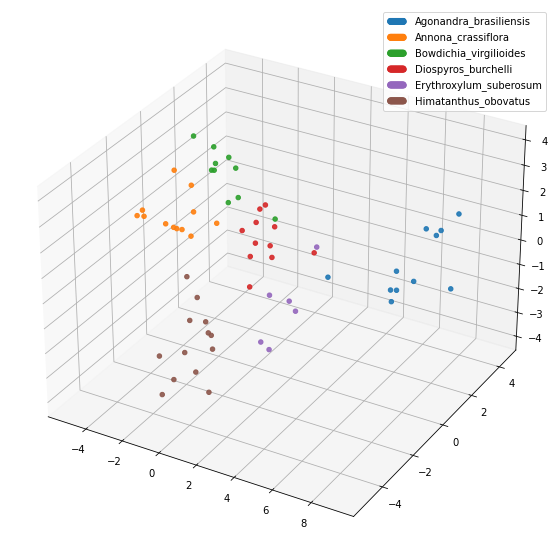

In [154]:
#GRAFICO DISPERSAO FUNCIONAL
from sklearn import preprocessing
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()


target_names = le.fit_transform(y_test)


target_names = np.unique(y_test)
#colors = ['red', 'green', 'blue']
lw = 2
ax = plt.axes(projection ="3d")
for i, target_name in zip(np.unique(y_test), target_names):
    ax.scatter3D(X_lda[y_test == i, 0], X_lda[y_test == i, 1],X_lda[y_test == i, 2], alpha=0.90, cmap ="binary_r",
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=100)
plt.rcParams["figure.figsize"]=19,10
#plt.title("Gráfico de Dispersão")

In [ ]:
lda_score = lda.score(X_test,y_test)

In [ ]:
lda.predict_proba(X_test)

In [ ]:
from sklearn import preprocessing
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()


target_names = le.fit_transform(y)

x_axis= X_lda[:,0]
y_axis= X_lda[:,1]
z_axis= X_lda[:,2]

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(x_axis, y_axis, z_axis, c=target_names, alpha=0.8, label = ['pera obovata'])
plt.title("simple 3D scatter plot")
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.rcParams["figure.figsize"]=10,10

In [ ]:
#GRAFICO DISPERSAO FUNCIONAL


plt.figure()
target_names = y.unique()
#colors = ['red', 'green', 'blue']
#lw = 2
ax = plt.axes(projection ="3d")
for i, target_name in zip(y.unique(), target_names):
    ax.scatter3D(X_lda[y == i, 0], X_lda[y == i, 1],X_lda[y == i, 2], alpha=.8, cmap='rainbow',
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=100)
plt.rcParams["figure.figsize"]=19,10

In [ ]:
np.shape(X_lda)

In [ ]:
x= X_lda[:,1]
y= X_lda[:,3]
z= X_lda[:,4]

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(x, y, z, c=target_names, alpha=0.75, label=target_names)
plt.title("simple 3D scatter plot")

plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.rcParams["figure.figsize"]=10,10

In [ ]:
plt.figure()
#colors = ['red', 'green', 'blue']
#lw = 2
for i, target_name in zip([0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)
